# Image Clustering with Pixels

## Read in the image set

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
N_PIXELS = 32 # width and height of each CIFAR image
N_CHANNELS = 3 # depth of each CIFAR image

In [3]:
def load_CIFAR_batch(path):
    """
    Loads a single CIFAR-10 batch from the given path.
    """
    with open(path, mode="rb") as f:
        raw = pickle.load(f, encoding="bytes")
        raw_images = raw[b'data']
        labels = raw[b'labels']
    return np.array(raw_images), np.array(labels)

In [4]:
def reshape_images(raw_images):
    """
    Converts the array of raw (3072,) shaped images into an
    array of (32, 32, 3) shaped images.
    """
    images = np.array(raw_images, dtype=float) / 255.0
    images = images.reshape([-1, N_CHANNELS, N_PIXELS, N_PIXELS])
    images = images.transpose([0, 2, 3, 1])
    return images

In [5]:
# check if we can load the first batch
images, labels = load_CIFAR_batch("cifar-10-batches-py/data_batch_1")
images = reshape_images(images)

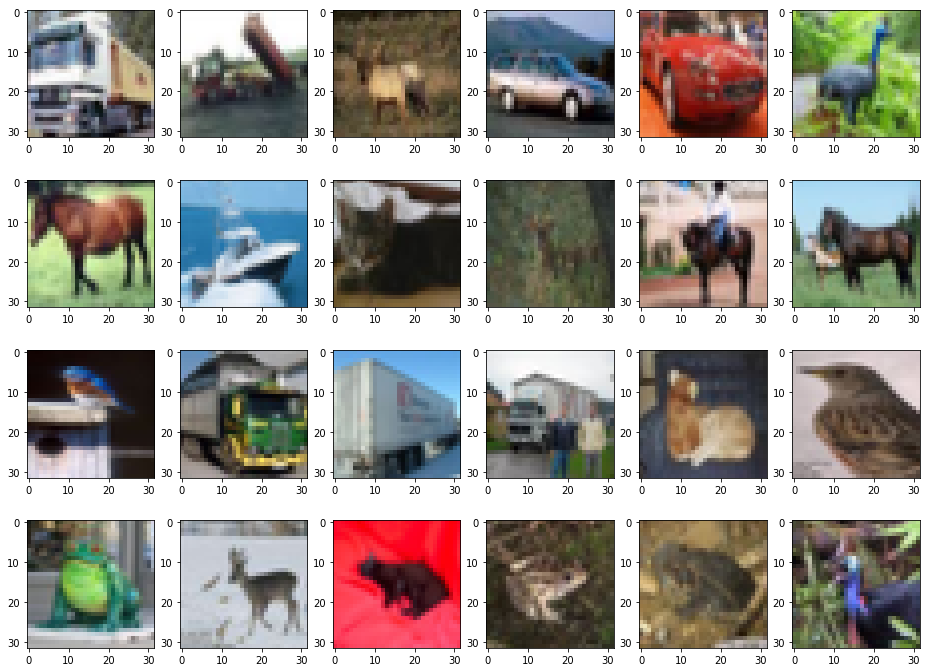

In [11]:
# check we've read/transformed our images correctly
fig = plt.figure(figsize=[16, 12])
cols = 6
rows = 4
for i in range(1, rows*cols+1):
    img = images[i]
    subplt = fig.add_subplot(rows, cols, i)
    plt.imshow(img)
plt.show()

## Raw pixel-based clustering

In [41]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [42]:
# flatten the (36, 36, 3) images into a (36 * 36 * 3) vector
flat_images = [img.flatten() for image in images]

In [43]:
# 36*36*3 is too many features, if you run KMeans on this, it will think everything is the same
# -- we need to apply some kind of dimensionality reduction to reduce the number of features
pca = PCA(n_components=36)
pca_images = pca.fit_transform(flat_images)

/Users/evan/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/pca.py:505: RuntimeWarning: divide by zero encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [44]:
# instantiate the clusterer
kmeans = KMeans(n_clusters=10)

In [45]:
# train it on the flattened images
kmeans.fit(pca_images)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=20, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
# generate image labels
cluster_ids = kmeans.predict(pca_images)

In [47]:
# group original images by cluster id
from collections import defaultdict
clusters = defaultdict(list)
for i in range(len(images)):
    clusters[ cluster_ids[i] ].append(images[i])

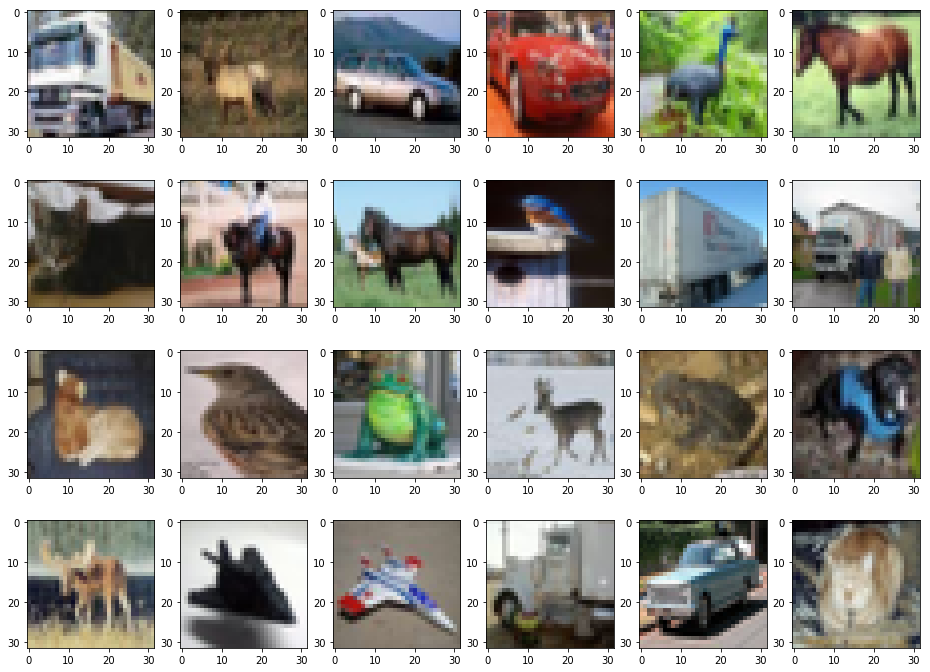

In [48]:
# take a look at a sample of the images in one of the clusters
fig = plt.figure(figsize=[16, 12])
cols = 6
rows = 4
for i in range(1, rows*cols+1):
    img = clusters[0][i]
    subplt = fig.add_subplot(rows, cols, i)
    plt.imshow(img)
plt.show()

IndexError: list index out of range

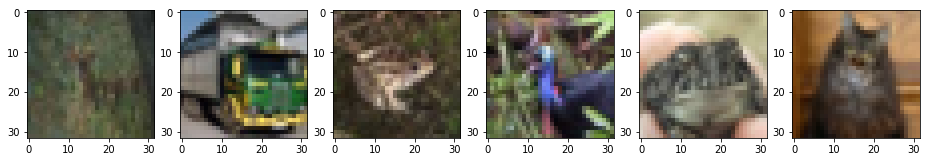

In [49]:
# take a look at a sample of the images in one of the clusters
fig = plt.figure(figsize=[16, 12])
cols = 6
rows = 4
for i in range(1, rows*cols+1):
    img = clusters[1][i]
    subplt = fig.add_subplot(rows, cols, i)
    plt.imshow(img)
plt.show()